In [1]:
import pandas as pd
import seaborn as sns

In [57]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


1. 컬럼의 이름변경 -> [ 총 금액, 팁, 성별 , 흡연 여부 , 요일 , 시간, 인원]
2. 총 금액, 팁 컬럼의 데이터를 소수점 첫째 자리까지 유지 하고 반올림
3. 식사 인원, 성명에 따라 (그룹화) 팁의 비율의 평균 값을 구하고, 시각화 ( 바형 그래프)

## Case 1 ## 

In [47]:
tips_data = tips.rename(columns={'total_bill':'총 금액','tip':'팁','sex':'성별','smoker':'흡연여부','day':'요일',
    'time':'시간','size':'인원'})
tips_data.head(2)

,총 금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [48]:
tips_data = tips_data.round(1)
tips_data.head(2)

,총 금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3


## Case 2 ## 

In [58]:
tips.head(2)
tips.columns = ['총 금액','팁','성별','흡연 여부','요일','시간','인원']
tips.head(2)

,총 금액,팁,성별,흡연 여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [ ]:
round (tips['총 금액'],1)

In [59]:
tips[['총 금액','팁']] = tips[['총 금액','팁']].round(1)
tips.head(2)

,총 금액,팁,성별,흡연 여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3


In [60]:
## 팁 비율 = (팁 / 총 금액) * 100 
tips['팁 비율'] = (tips['팁'] / tips['총 금액']) * 100 
tips.head(2)

,총 금액,팁,성별,흡연 여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854


In [70]:
group_data = tips.groupby(['인원','성별']).mean()['팁 비율']

C:\Users\ezen\AppData\Local\Temp\ipykernel_13160\606206363.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = tips.groupby(['인원','성별']).mean()['팁 비율']


In [ ]:
group_data.plot.barh()

In [72]:
import matplotlib.pyplot as plt

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


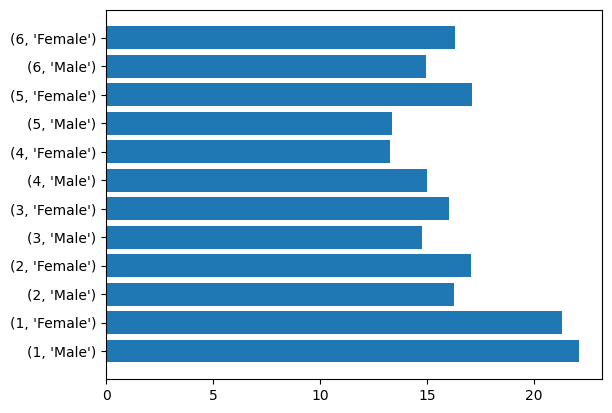

In [82]:
x = group_data.index
list_x = list(range(0, len(x),1))
y = group_data.values
print(list_x)
plt.barh(list_x,y)
plt.yticks(list_x,x)
plt.show()

In [ ]:
group_data = tips.groupby(['인원', '성별']).mean()[['팁 비율']]
group_data

1.남자의 팁 비율 데이터 프레임 생성
2.여자의 팁 비율 데이터 프레임 생성
3.2개의 데이터 프레임을 시각화

In [104]:
## hint 
group_data.index
## 멀티 인덱스에 성별 부분만 출력
for i in group_data.index:
    print(i[1])

Male
Female
Male
Female
Male
Female
Male
Female
Male
Female
Male
Female


In [ ]:
sample = tips.set_index('총 금액') ## '총 금액'이 index 로 변화되어 출력
#sample.loc[:,'팁'] ## 팁에 해당하는 값들만 시리즈 형태로 출력
sample.loc[(10.3,'Male'),:] # 총 금액 10.3 에 해당하는 값만 출력


## Step 1 : 비어있는 데이터프레임 생성 

## Step2 : for 문을 이용하여 male 인 경우 1, female 인 경우 2를 출력 

In [ ]:
for i in group_data.index:
    if i[1] == 'Male':
        print(1)
    else:
        print(2)

In [ ]:
### hint code ####
test_df = pd.DataFrame()
test2_df = pd.DataFrame()
for i in tips.index:
    if i % 10 == 0:
        test_df = pd.concat([test_df, tips.loc[[i]]])
    if i % 50 == 0:
        test2_df = pd.concat([test2_df,tips.loc[[i]]])
test_df
test2_df

## step4 : for 문에서 male,female 인 경우 비어있는 데이터프레임에서 행 추가

In [ ]:
male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in group_data.index:
    data = group_data.loc[[i]]
    if i[1] == 'Male':
        male_data = pd.concat([male_data, data])
    else:
        female_data = pd.concat([female_data, data])
print(male_data)
print(female_data)


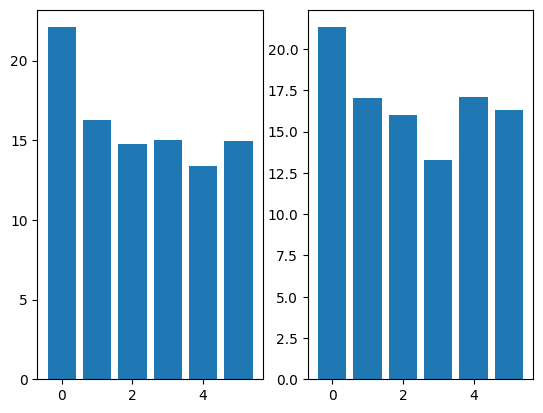

In [157]:
x1 = range(len(male_data.index))
x2 = range(len(female_data.index))
y1 = male_data['팁 비율']
y2 = female_data['팁 비율']

plt.subplot(1,2,1)
plt.bar(x1, y1)
plt.subplot(1,2,2)
plt.bar(x2, y2)
plt.show()

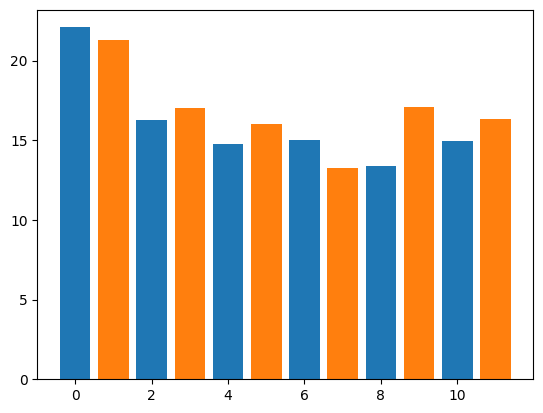

In [164]:
x1 = range(0 , len(male_data.index)*2 , 2)
x2 = range(1 , len(female_data.index)*2 ,2)
y1 = male_data['팁 비율']
y2 = female_data['팁 비율']
plt.bar(x1, y1)
plt.bar(x2, y2)
plt.show()

### pivot_table 
1. 그룹화
2. 행 인덱스
3. 형 인덱스
4. 데이터 값.
5. 데이터의 집계

In [168]:
import seaborn as sns

In [170]:
titanic = sns.load_dataset('titanic')[['age','sex','class','fare','survived']]
titanic.head(1)

,age,sex,class,fare,survived
0,22.0,male,Third,7.25,0


In [172]:
pd.pivot_table(
    titanic,           ## 기준이 되는 데이터 프레임
    index   = 'class', ##  등급별로 그룹화
    columns = 'sex',  ## 성별로 분활
    values  = 'age', ## 그룹화된 데이터들의 나이를 선택 
    aggfunc = 'mean' ## 나이의 평균
)

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


### 클래스별 성별 생존자의 수를 출력 

## case 1 group by 

In [189]:
titanic.groupby(['class','sex']).sum()[['survived']]

survived
class  sex             
First  female        91
       male          45
Second female        70
       male          17
Third  female        72
       male          47

## Case 2 pivot_table

In [188]:
pd.pivot_table(
    titanic,
    index = ['class','sex'],
    values = 'survived',
    aggfunc= 'sum'

)

survived
class  sex             
First  female        91
       male          45
Second female        70
       male          17
Third  female        72
       male          47

In [192]:
## 자리등급과  성별에 따라 
## 생존자의 사망자의
## 나이의 평균 
pd.pivot_table(
    titanic,
    index = ['class','sex'],
    columns = 'survived',
    values = 'age',
    aggfunc= 'mean'
)

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211